# ODE Integrators I: Explicit Methods [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ua-2025q3-astr501-513/ua-2025q3-astr501-513.github.io/blob/main/513/08/notes.ipynb)

Ordinary differential equations form the mathematical foundation of
physics.
They describe how systems evolve in time, e.g., Newton's second law of
motion is
\begin{align}
  f = m a = m \frac{d^2x}{dt^2},
\end{align}
which is a second-order ODE relating force to acceleration.
More generally, an ODE relates a function of time to its time
derivatives.

While ODEs capture the essence of dynamics, analytic solutions are
possible only in special cases.
Most real systems involve nonlinear forces, damping, or external
driving terms that make exact solutions impossible.
Numerical integration allows us to approximate trajectories step by
step and study systems far beyond what can be solved by hand.

## Problem Definition and Types of ODEs

Consider two forms of first-order ODEs:

1. Time-dependent forcing only:
   \begin{align}
     \frac{dx}{dt} = f(t).
   \end{align}
   Here, the derivative depends only on time.
   Solutions are obtained by direct integration:
   \begin{align}
     x(t) = x(t_0) + \int_{t_0}^{t} f(t') \, dt'.
   \end{align}

2. State- and time-dependent dynamics:
   \begin{align}
     \frac{dx}{dt} = f(x, t).
   \end{align}
   Now, the derivative depends on the state $x$ itself.
   The function we want to solve for also appears inside the RHS,
   making direct integration impossible.
   We cannot evaluate the integral without already knowing $x(t)$ at
   intermediate points.

The first type reduces to standard numerical quadrature (trapezoidal
rule, Simpson's rule, etc.), which we studied earlier.
The second case, nonlinear dependence on both $x$ and $t$, is the
typical situation in physics.
Examples include planetary orbits, nonlinear oscillators, chaotic
systems, and interacting biological populations.
In such cases:
* Direct integration is often not feasible, the problem must be solved
  as an initial value problem (IVP).
* Analytic solutions are often unknown or intractable.
* Numerical methods approximate the solution incrementally, using
  small time steps to trace the system's evolution.

By discretizing time and advancing step-by-step, we can model the
behavior of even the most complex systems.
This is the core idea behind numerical ODE integrators.

## Forward Euler Method

Euler's method is the simplest techniques for numerically solving
ordinary differential equations.
This method provides an easy way to approximate the solution of an IVP
by advancing one small step at a time.

We can apply Euler's method to an ODE of the form:
\begin{align}
  \frac{dx}{dt} = f(x, t), \quad x(t_0) = x_0
\end{align}
where $x_0$ is the initial value of $x$ at time $t = t_0$.
However, as we will see below, it is usually not recommanded in
pratical calculations because of its stability properties.

There are three simple ways to derive Euler's method.
The easiest way is simply hold $x$ fixed in $f(x, t)$ and apply the
left Reimann sum.
The left Reimann sum is first order in step size by approximating
$f(x, t)$ as a constant.
In this sense, holding $x$ is somewhat "self-consistent" in terms of
approximation order.

We then recall the definition of a deriviative:
\begin{align}
  f(x, t) = \frac{dx}{dt} = \lim_{\Delta t\rightarrow 0}\frac{x(t + \Delta t) - x(t)}{\Delta t}.
\end{align}
If we simply remove the limit and keep the "finite difference" part,
then it is trivial to show
\begin{align}
  x(t + \Delta t) &\approx x(t) + f(x(t), t)\Delta t.
\end{align}
Which is nothing but again the forward Euler method.
While very intuitive, the above two derivations do not formally show
the order of the Euler method.

We may also consider a numerical approximation to the solution of an
ODE.
We approximate the solution at time $t_{n+1} = t_n + \Delta t$ by
using the Taylor expansion:
\begin{align}
  x(t_{n+1}) = x(t_n) + f(x(t_n), t_n) \Delta t + \mathcal{O}(\Delta t^2)
\end{align}
Neglecting the higher-order terms in the expansion, we obtain once
again the Forward Euler Method:
\begin{align}
  x_{n+1} = x_n + f(x_n, t_n) \Delta t
\end{align}
It is thus a step-by-step approach that proceeds by evaluating $f(x,
t)$ at each time point and then advancing to the next point.
It is an explicit method in 1st order.

Let's solve the simple differential equation:
\begin{align}
  \frac{dx}{dt} = \lambda x(t)
\end{align}

This equation has solution
\begin{align}
  x(t) = \exp[\lambda(t-t_0)]
\end{align}

If we choose $\lambda = 1$ and $x(0) = 1$, the solutoin reduces to
$x(t) = \exp(t)$.

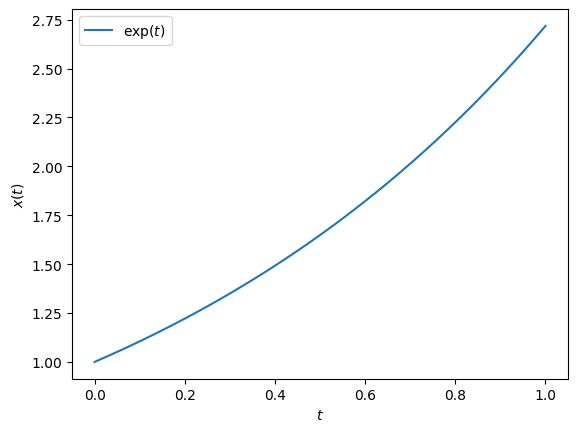

In [1]:
# Let's visualize the solution:

import numpy as np
from matplotlib import pyplot as plt

T = np.linspace(0, 1, 1001)
X = np.exp(T)

plt.plot(T, X, label=r"$\exp(t)$")
plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")
plt.legend()

In [2]:
# Let's implement Euler's method, with history

def Euler(f, x, t, dt, n):
    X = [np.array(x)]
    T = [np.array(t)]
    for _ in range(n):
        X.append(X[-1] + dt * f(X[-1]))
        T.append(T[-1] + dt)
    return np.array(X), np.array(T)

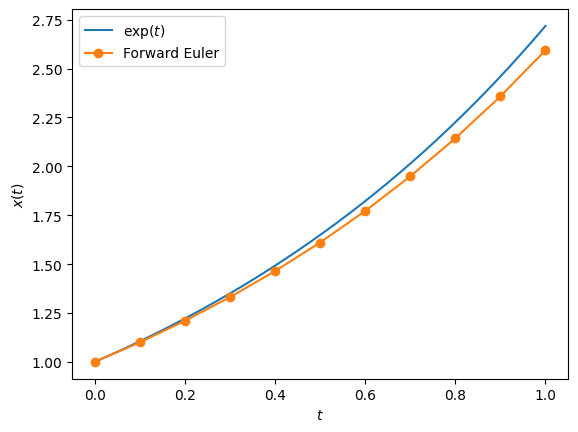

In [3]:
# Let's test Euler's method

f  = lambda x: x

n  = 10
dt = 1/n

x0 = 1
t0 = 0

X1, T1 = Euler(f, x0, t0, dt, n)

plt.plot(T,  X,        label=r"$\exp(t)$")
plt.plot(T1, X1, "o-", label=r"Forward Euler")
plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")
plt.legend()

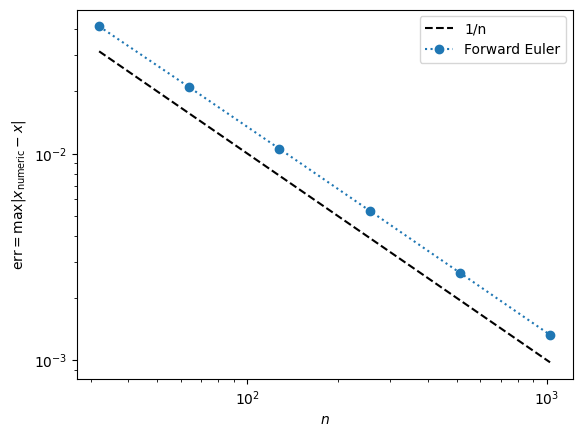

In [4]:
# As always, we can study the convergence of the numerical method

def Err(n=100):
    X1, T1 = Euler(f, 1, 0, 1/n, n)
    X = np.exp(T1)
    return np.max(abs(X1 - X))

N  = np.array([32, 64, 128, 256, 512, 1024])
E1 = np.array([Err(n) for n in N])

plt.loglog(N, 1/N, "k--", label=r"1/n")
plt.loglog(N, E1,  "o:",  label=r"Forward Euler")
plt.xlabel(r"$n$")
plt.ylabel(r"$\text{err} = \max|x_\text{numeric} - x|$")
plt.legend()

### High-Order and System of ODEs

In computational astrophysics, we often encounter systems governed by
Newton's laws:
\begin{align}
  m \frac{d^2 x}{dt^2} = f(x, t)
\end{align}

This equation is a second-order ordinary differential equation because
it involves the second derivative of $x$ with respect to $t$.
However, it is often more practical to convert second-order ODEs into
a system of first-order ODEs.
To do this, we introduce a new variable, $v = dx/dt$, representing the
velocity of the object.
This substitution allows us to rewrite the second-order ODE as two
coupled first-order ODEs:
\begin{align}
  \frac{dx}{dt} &= v \\
  \frac{dv}{dt} &= \frac{1}{m}f(x, t)
\end{align}

This formulation provides a convenient way for numerical methods,
which are generally well-suited to solving systems of first-order
ODEs.
To further simplify, we can express these equations in vector notation
by defining $\mathbf{x} = [x, v]^t$ and $\mathbf{f} = [v, f/m]^t$.
The system then becomes:
\begin{align}
  \frac{d\mathbf{x}}{dt} = \mathbf{f}(\mathbf{x}, t).
\end{align}
This vector form emphasizes the structure of the system and enables us
to apply general numerical techniques to solve both equations
simultaneously.

To illustrate this approach, let's consider a classic example: the
simple pendulum under gravity.
The motion of a pendulum of length $l$, swinging under gravity $g$,
can be described by the second-order equation:
\begin{align}
  \frac{d^2\theta}{dt^2} + \frac{g}{l} \sin\theta = 0
\end{align}

Here, $\theta(t)$ is the angle of the pendulum with the vertical, and
the term $\sin \theta$ introduces nonlinearity, which makes the
equation challenging to solve analytically.
Converting this equation into a system of first-order ODEs allows us
to handle it more effectively with numerical methods.
We define $\Omega = \frac{d\theta}{dt}$, the angular velocity, leading
to the following system:
\begin{align}
  \frac{d\theta(t)}{dt} &= \Omega(t)\\
  \frac{d\Omega(t)}{dt} &= - \frac{g}{l}\sin\theta(t)
\end{align}

In vector notation, we represent the system as:
\begin{align}
  \frac{d\mathbf{x}(t)}{dt} = \mathbf{f}(\mathbf{x}, t)
\end{align}
where
\begin{align}
  \mathbf{x} &= \begin{bmatrix} \theta(t) \\ \Omega(t) \end{bmatrix}, \\
  \mathbf{f}(\mathbf{x}, t) &= \begin{bmatrix} \Omega(t) \\ -\frac{g}{l} \sin \theta(t) \end{bmatrix}.
\end{align}

In later part of the lecture, we will try to solve this full problem.
But to derive and compare different numerical methods, let's first
reduce the problem to something that has analytical solutions.
Specifically, we can simplify the pendulum problem further by assuming
small oscillations, where the angle $\theta$ is small enough that
$\sin \theta \approx \theta$.
This approximation linearizes the equation of motion, reducing the
system to a simple harmonic oscillator.

In this approximation, the equation of motion becomes:
\begin{align}
  \frac{d^2 \theta}{dt^2} + \frac{g}{l} \theta = 0
\end{align}
As a result, the system of ODEs becomes:
\begin{align}
  \mathbf{x} &= \begin{bmatrix} \theta(t) \\ \Omega(t) \end{bmatrix}, \\
  \mathbf{f}(\mathbf{x}, t) &= \begin{bmatrix} \Omega(t) \\ -\frac{g}{l} \theta(t) \end{bmatrix}.
\end{align}

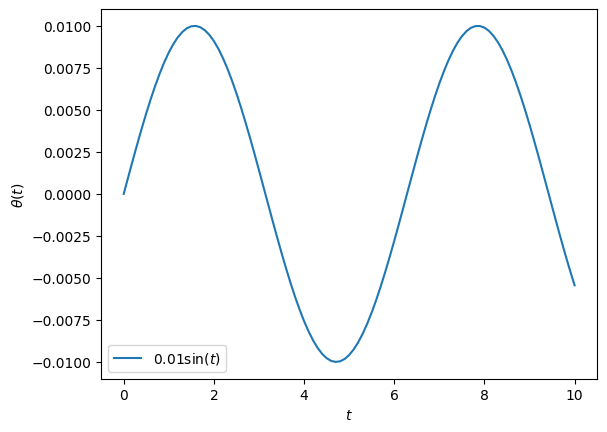

In [5]:
# Let's first plot the analytical solution

T     = np.linspace(0, 10, 101)
Theta = 0.01 * np.sin(T)

plt.plot(T, Theta, label=r"$0.01\sin(t)$")
plt.xlabel(r"$t$")
plt.ylabel(r"$\theta(t)$")
plt.legend()

In [6]:
# Thanks to operator overriding, our forward Euler method is almost
# ready to solve system of ODEs!
# There is no need to rewrite it!


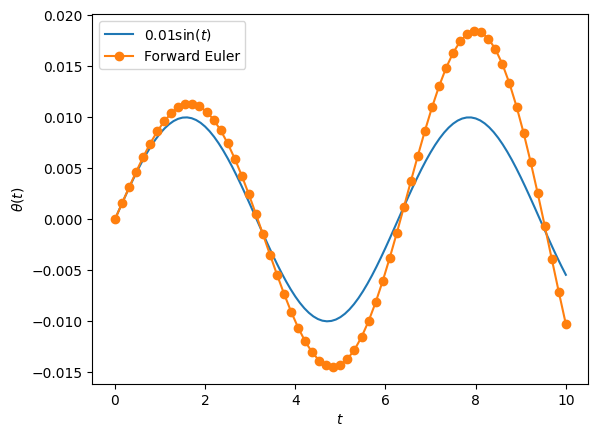

In [7]:
# Compare the analytical and numerical solutions

def F(x):
    theta, omega = x
    return np.array([omega, -theta])

n  = 64
dt = 10 / n

X0 = [0, 0.01]
t0 = 0

X1, T1 = Euler(F, X0, t0, dt, n)

Theta1 = X1[:,0]
Omega1 = X1[:,1]

plt.plot(T,  Theta,        label=r"$0.01\sin(t)$")
plt.plot(T1, Theta1, "o-", label=r"Forward Euler")
plt.xlabel(r"$t$")
plt.ylabel(r"$\theta(t)$")
plt.legend()

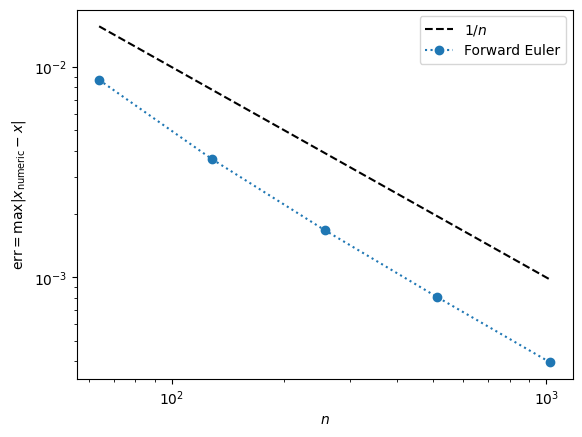

In [8]:
# Again, we can study the convergence of the numerical method

def Err(integrator, n=100):
    Xf, Tf = integrator(F, [0, 0.01], 0, 10/n, n)
    Thetaf = Xf[:,0]
    Theta  = 0.01 * np.sin(Tf)
    return np.max(abs(Thetaf - Theta))

N  = np.array([64, 128, 256, 512, 1024])
E1 = np.array([Err(Euler, n) for n in N])

plt.loglog(N, 1/N, "k--", label=r"$1/n$")
plt.loglog(N, E1,  "o:",  label=r"Forward Euler")
plt.xlabel(r"$n$")
plt.ylabel(r"$\text{err} = \max|x_\text{numeric} - x|$")
plt.legend()

## Second-Order Runge-Kutta Method

The Forward Euler method is only first-order accurate, meaning its
error decreases linearly with the step size $\Delta t$, as we saw in
the convergence plots.
While it is simple to implement, this method's convergence rate is
too slow.
Achieving higher accuracy requires very small steps, which can become
computationally expensive.

This naturally raises the question: can we improve the convergence
rate of our numerical solution, reducing the error more rapidly as we
use smaller steps?

To explore this, we can draw inspiration from our previous work on
numerical integration.
In that context, we observed that the midpoint (or central) Riemann
sum converges faster than the left or right Riemann sums.
This suggests that a midpoint approach may also provide advantages in
solving ODEs.

One possible improvement is to propose a midpoint method that attempts
to evaluate the function $\mathbf{f}$ at the midpoint between steps.
Mathematically, this approach can be expressed as:
\begin{align}
  \mathbf{x}_{n+1} = \mathbf{x}_n + \mathbf{f}(\mathbf{x}_{n+1/2}, t_{n+1/2}) \Delta t
\end{align}

However, a significant problem arises: the midpoint value
$\mathbf{f}_{n+1/2} \equiv \mathbf{f}(\mathbf{x}_{n+1/2}, t_{n+1/2})$
is unknown at step $n$.
We need to know the value of $\mathbf{x}$ at the midpoint $t_{n+1/2}$
to use this method, but this value cannot be calculated without
already knowing the future values of $\mathbf{x}$.
This issue makes a straightforward midpoint method impractical for
generic ODEs, where $\mathbf{f}$ depends on both $\mathbf{x}$ and $t$.

An exception occurs if $\mathbf{f}$ depends only on $t$, as in
$d\mathbf{x}/dt = \mathbf{f}(t)$;
in such cases, a true midpoint method is feasible, which is nothing
but out middle Reimann sum.
However, for most ODEs, including those where $\mathbf{f}$ depends on
$\mathbf{f}$, a different approach is necessary.

To work around this issue, we can approximate the midpoint value
instead of calculating it exactly.
It suffices to find an approximate solution for $\mathbf{x}$ at the
half-step, which we denote as $\mathbf{x}_{n+1/2}$.

The simplest way to do this is to use the Forward Euler method to
compute an estimated value at the midpoint.
Specifically, we can approximate $\mathbf{x}$ at $t_{n+1/2}$ as:
\begin{align}
  \tilde{\mathbf{x}}_{n+1/2} = \mathbf{x}_n + \mathbf{f}(\mathbf{x}_n, t_n) \frac{\Delta t}{2}
\end{align}
Using this half-step approximation, we then proceed with a full step
to find $\mathbf{x}_{n+1}$ by evaluating $f$ at the midpoint:
\begin{align}
  \mathbf{x}_{n+1} = \mathbf{x}_n + f(\tilde{\mathbf{x}}_{n+1/2}, t_{n+1/2}) \Delta t
\end{align}
This approach, known as the second-order Runge-Kutta method,
incorporates midpoint information and achieves second-order accuracy.

This second-order Runge-Kutta method improves convergence by
leveraging an approximate midpoint, resulting in a more accurate
solution than the first-order Euler method without prohibitively small
step size.

In [9]:
def RK2(f, x, t, dt, n):
    X = [np.array(x)]
    T = [np.array(t)]
    for _ in range(n):
        k1 = f(X[-1])
        k2 = f(X[-1] + 0.5 * dt * k1)
        X.append(X[-1] + dt * k2)
        T.append(T[-1] + dt)
    return np.array(X), np.array(T)

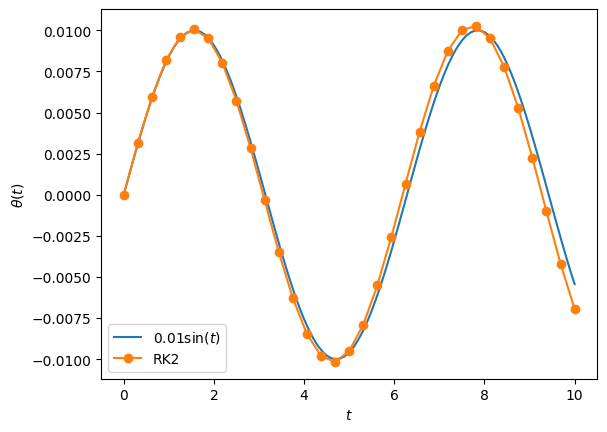

In [10]:
n  = 32
dt = 10 / n
X0 = [0, 0.01]
t0 = 0

X2, T2 = RK2(F, X0, 0, dt, n)
plt.plot(T,  0.01 * np.sin(T), label=r"$0.01\sin(t)$")
plt.plot(T2, X2[:,0], "o-",    label=r"RK2")
plt.xlabel(r"$t$")
plt.ylabel(r"$\theta(t)$")
plt.legend()

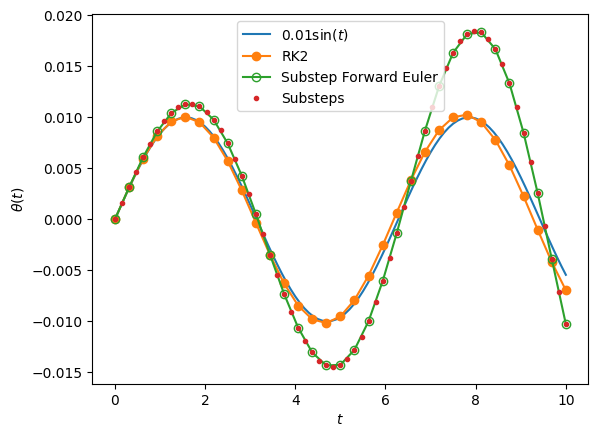

In [11]:
X1, T1 = Euler(F, X0, 0, dt/2, 2*n)
plt.plot(T,       0.01 * np.sin(T),            label=r"$0.01\sin(t)$")
plt.plot(T2,      X2[:,0],   'o-',             label=r"RK2")
plt.plot(T1[::2], X1[::2,0], 'o-', mfc='none', label=r"Substep Forward Euler")
plt.plot(T1,      X1[:,0],   '.',              label=r"Substeps")
plt.xlabel(r"$t$")
plt.ylabel(r"$\theta(t)$")
plt.legend()

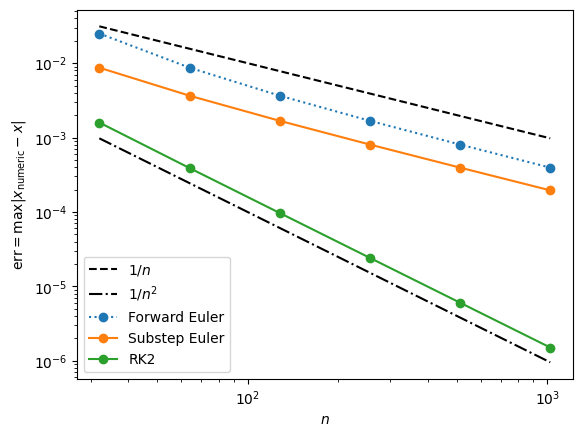

In [12]:
# Again, we can study the convergence of the numerical method

N   = np.array([32, 64, 128, 256, 512, 1024])
E1  = np.array([Err(Euler, n) for n in   N])
E12 = np.array([Err(Euler, n) for n in 2*N])
E2  = np.array([Err(RK2,   n) for n in   N])

plt.loglog(N, 1/N,    "k--", label=r"$1/n$")
plt.loglog(N, 1/N**2, "k-.", label=r"$1/n^2$")
plt.loglog(N, E1,     "o:",  label=r"Forward Euler")
plt.loglog(N, E12,    "o-",  label=r"Substep Euler")
plt.loglog(N, E2,     "o-",  label=r"RK2")
plt.xlabel(r"$n$")
plt.ylabel(r"$\text{err} = \max|x_\text{numeric} - x|$")
plt.legend()

The convergence plot clearly demonstrates that RK2 achieves
second-order accuracy.
This means that the error decreases quadratically with the step size
$\Delta t$.
For example, using 1024 points for the integration not only doubles
the computational cost compared to using 512 points but also improves
the accuracy of the solution by approximately 250 times.
This significant increase in accuracy suggests that higher-order
methods offer substantial benefits, especially for problems requiring
high precision.
Naturally, this brings us to the question: can we improve the accuracy
even further than what RK2 provides?

## Fourth-Order Runge-Kutta Method

In the second-order Runge-Kutta method (RK2), the midpoint value
$\mathbf{x}_n + (\Delta t/2)\,\mathbf{k}_1$ is obtained using a
simple approximation derived from the Forward Euler method.
Specifically, we first calculate $\mathbf{k}_1$ as:
\begin{align}
  \mathbf{k}_1 = \mathbf{f}(\mathbf{x}_n, t_n)
\end{align}
and then use this to approximate $\mathbf{k}_2$:
\begin{align}
  \mathbf{k}_2 = \mathbf{f}\left(\mathbf{x}_n + \frac{1}{2}\Delta t\,\mathbf{k}_1, t_n + \frac{1}{2}\Delta t\right)
\end{align}
This approach provides a basic estimate for the midpoint.

However, we can improve this estimate by refining our approximation of
the midpoint using another application of the Forward Euler estimate.
We calculate $\mathbf{k}_3$ as follows:
\begin{align}
  \mathbf{k}_3 = \mathbf{f}\left(\mathbf{x}_n + \frac{1}{2}\Delta t\,\mathbf{k}_2, t_n + \frac{1}{2}\Delta t\right)
\end{align}
Finally, to complete the full step with this improved midpoint
estimate, we compute $\mathbf{k}_4$:
\begin{align}
  \mathbf{k}_4 = \mathbf{f}(\mathbf{x}_n + \Delta t\,\mathbf{k}_3, t_n + \Delta t)
\end{align}

In [13]:
# HANDSON: Use `k4` alone to create an ODE integrator.
#          What is its order?


The values $\mathbf{k}_1$, $\mathbf{k}_2$, $\mathbf{k}_3$, and
$\mathbf{k}_4$ each provide estimates of how $\mathbf{x}$ will change
over one step, though they carry different error terms.
By combining these terms carefully, we can construct a higher-order
method that effectively cancels out some of the error components.
This technique, when implemented correctly, provide an even more
accurate approximation than any single $\mathbf{k}_i$-estimate alone.

The classical fourth-order Runge-Kutta method (RK4) is a widely used
technique for numerically solving ordinary differential equations with
high accuracy.
This method calculates four intermediate values at each time step,
combining them to achieve fourth-order accuracy.

The process begins by computing four slopes, $\mathbf{k}_1$,
$\mathbf{k}_2$, $\mathbf{k}_3$, and $\mathbf{k}_4$, which represent
different estimates of the derivative over the interval:
\begin{align}
  \mathbf{k}_1 &= \mathbf{f}     (\mathbf{x}_n,                                     t_n                            ) \\
  \mathbf{k}_2 &= \mathbf{f}\left(\mathbf{x}_n + \frac{1}{2}\Delta t\,\mathbf{k}_1, t_n + \frac{1}{2}\Delta t\right) \\
  \mathbf{k}_3 &= \mathbf{f}\left(\mathbf{x}_n + \frac{1}{2}\Delta t\,\mathbf{k}_2, t_n + \frac{1}{2}\Delta t\right) \\
  \mathbf{k}_4 &= \mathbf{f}\left(\mathbf{x}_n +            \Delta t\,\mathbf{k}_3, t_n +            \Delta t\right)
\end{align}
Once these intermediate values are calculated, they are combined to
update $\mathbf{x}$ at the next step.

The weighted average of these values, with coefficients that cancel
higher-order error terms, is assumed to have the generic form
\begin{align}
  \mathbf{x}_{n+1} = \mathbf{x}_n + a_1 \mathbf{k}_1 + a_2 \mathbf{k}_2 + a_3 \mathbf{k}_3 + a_4 \mathbf{k}_4 + \mathcal{O}(\Delta t^5).
\end{align}

But what should be the values of $a_i$?
The derivation turns out to be tedious but straightforwards.

Recalling we want to solve an ODE:
\begin{align}
  \frac{d\mathbf{x}}{dt} = \mathbf{f}(\mathbf{x})
\end{align}
The solution $\mathbf{x}(t)$ evaluated at $t_{n+1} = t_n + \Delta t$
can be written in terms of $\mathbf{x}(t)$ evaluated at $t_n$ in
Taylor series.
I.e.,
\begin{align}
  \mathbf{x}_{n+1} = \mathbf{x}_n + \dot{\mathbf{x}}_n \Delta t + \frac{1}{2} \ddot{\mathbf{x}}_n \Delta t + \frac{1}{3!} \dddot{\mathbf{x}}_n \Delta t^3 + \cdots
\end{align}
Here, we use the shorthand $\mathbf{x}_n \equiv \mathbf{x}(t_n)$ and
over-dot to represent time-derivatives.

Substituting the ODE into the Taylor series and use
\begin{align}
  \frac{d\mathbf{f}}{dt}      &= \frac{d^2 \mathbf{x}}{dt^2}
                               = \frac{d\mathbf{x}}{dt}\cdot\nabla\mathbf{f}(\mathbf{x}(t))
                               = (\mathbf{f}\cdot\nabla)\mathbf{f}, \\
  \frac{d^2 \mathbf{f}}{dt^2} &= \frac{d^3 \mathbf{x}}{dt^3}
                               = \frac{d}{dt}(\mathbf{f}\cdot\nabla)\mathbf{f}
                               = \{[(\mathbf{f}\cdot\nabla)\mathbf{f}]\cdot\nabla\}\mathbf{f} + [\mathbf{f}\cdot(\mathbf{f}\cdot\nabla)\nabla]\mathbf{f}
\end{align}
we obtain
\begin{align}
  \mathbf{x}_{n+1} = \mathbf{x}_n
                   + \mathbf{f}_n \Delta t
                   + \frac{1}{2}\Big((\mathbf{f}\cdot\nabla)\mathbf{f}\Big)\Delta t
                   + \frac{1}{3!}\Big(\{[(\mathbf{f}\cdot\nabla)\mathbf{f}]\cdot\nabla\}\mathbf{f} + [\mathbf{f}\cdot(\mathbf{f}\cdot\nabla)\nabla]\mathbf{f}\Big)\Delta t^2
                   + \cdots
\end{align}

To construct Runge-Kutta method, we consider a formulation
\begin{align}
  \mathbf{x}_{n+1} = \mathbf{x}_n + a_1 \Delta_1 \mathbf{x}_n + a_2 \Delta_2 \mathbf{x}_n + \cdots + a_s \Delta_s \mathbf{x}_n
\end{align}
for some $s$, where
\begin{align}
  \Delta_1 \mathbf{x}_n &\equiv \mathbf{f}(\mathbf{x}(t_n)) \Delta t \\
  \Delta_2 \mathbf{x}_n &\equiv \mathbf{f}(\mathbf{x}(t_n + b_2 \Delta t)) \Delta t
  = \left[\mathbf{f}_n + \Big((\mathbf{f}\cdot\nabla)\mathbf{f}\Big) (b_2 \Delta t)
                       + \frac{1}{2} \Big(\{[(\mathbf{f}\cdot\nabla)\mathbf{f}]\cdot\nabla\}\mathbf{f} + [\mathbf{f}\cdot(\mathbf{f}\cdot\nabla)\nabla]\mathbf{f}\Big) (b_2 \Delta t)^2 + \cdots\right]\Delta t\\
  \cdots \\
  \Delta_s \mathbf{x}_n &\equiv \mathbf{f}(\mathbf{x}(t_n + b_s \Delta t)) \Delta t
  = \left[\mathbf{f}_n + \Big((\mathbf{f}\cdot\nabla)\mathbf{f}\Big) (b_s \Delta t)
                       + \frac{1}{2} \Big(\{[(\mathbf{f}\cdot\nabla)\mathbf{f}]\cdot\nabla\}\mathbf{f} + [\mathbf{f}\cdot(\mathbf{f}\cdot\nabla)\nabla]\mathbf{f}\Big) (b_s \Delta t)^2 + \cdots\right]\Delta t
\end{align}

Substitute, we obtain
\begin{align}
  \mathbf{x}_{n+1} = \mathbf{x}_n
  &+ a_1       \mathbf{f}_n \Delta t \\
  &+ a_2 \left[\mathbf{f}_n \Delta t
               + b_2 \mathbf{f}'_n \mathbf{f}_n \Delta t^2
               + \frac{1}{2} b_2^2 \Big(\{[(\mathbf{f}\cdot\nabla)\mathbf{f}]\cdot\nabla\}\mathbf{f} + [\mathbf{f}\cdot(\mathbf{f}\cdot\nabla)\nabla]\mathbf{f}\Big) \Delta t^3 + \cdots\right] \\
  &+ \cdots \\
  &+ a_s \left[\mathbf{f}_n \Delta t
               + b_s \mathbf{f}'_n \mathbf{f}_n \Delta t^2
               + \frac{1}{2} b_s^2 \Big(\{[(\mathbf{f}\cdot\nabla)\mathbf{f}]\cdot\nabla\}\mathbf{f} + [\mathbf{f}\cdot(\mathbf{f}\cdot\nabla)\nabla]\mathbf{f}\Big) \Delta t^3 + \cdots\right]
\end{align}

For 4th-order scheme, collecting the terms and require all terms up to
$\Delta t^4$ match, we obtain the conditions
\begin{align}
  a_1       + a_2       + a_3       + a_4       &=       1     \\
              a_2 b_2   + a_3 b_3   + a_4 b_4   &= \frac{1}{2} \\
              a_2 b_2^2 + a_3 b_3^2 + a_4 b_4^2 &= \frac{1}{3} \\
              a_2 b_2^3 + a_3 b_3^3 + a_4 b_4^3 &= \frac{1}{4}
\end{align}

For the classical 4th-order Runge-Kutta scheme, we have already
decided $b_1 = 0$, $b_2 = b_3 = 1/2$, and $b_4 = 1$.
Therefore, the system of coefficients read:
\begin{align}
  a_1       + a_2       + a_3       + a_4 &=       1     \\
  \frac{1}{2} a_2 + \frac{1}{2} a_3 + a_4 &= \frac{1}{2} \\
  \frac{1}{4} a_2 + \frac{1}{4} a_3 + a_4 &= \frac{1}{3} \\
  \frac{1}{8} a_2 + \frac{1}{8} a_3 + a_4 &= \frac{1}{4}
\end{align}
It is then easy to verify that
\begin{align}
  (a_1, a_2, a_3, a_4) = \left(\frac{1}{6},\frac{1}{3},\frac{1}{3},\frac{1}{6}\right)
\end{align}
is the solution.

We are finally ready to implement RK4!

In [14]:
def RK4(f, x, t, dt, n):
    X = [np.array(x)]
    T = [np.array(t)]
    for _ in range(n):
        k1 = f(X[-1]                )
        k2 = f(X[-1] + 0.5 * dt * k1)
        k3 = f(X[-1] + 0.5 * dt * k2)
        k4 = f(X[-1] +       dt * k3)
        X.append(X[-1] + dt * (k1/6 + k2/3 + k3/3 + k4/6))
        T.append(T[-1] + dt)
    return np.array(X), np.array(T)

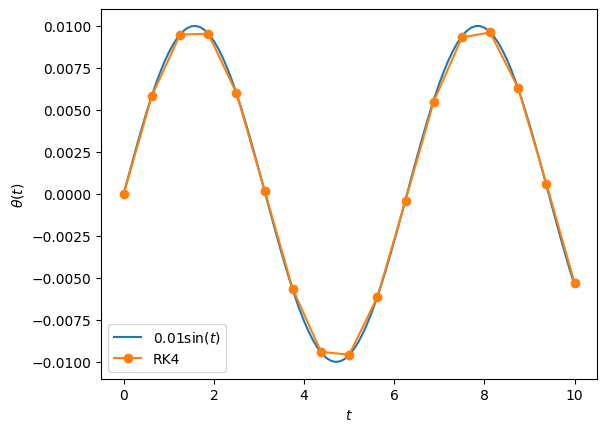

In [15]:
n  = 16
dt = 10/n
X0 = [0, 0.01]
t0 = 0

X4, T4 = RK4(F, X0, t0, dt, n)
plt.plot(T, 0.01*np.sin(T), label=r"$0.01\sin(t)$")
plt.plot(T4, X4[:,0], "o-", label=r"RK4")
plt.xlabel(r"$t$")
plt.ylabel(r"$\theta(t)$")
plt.legend()

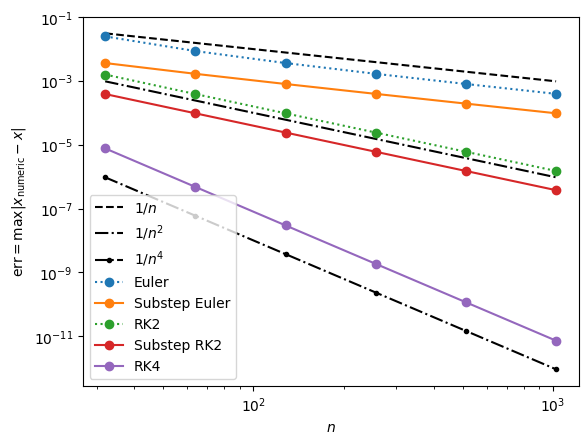

In [16]:
# Again, we can study the convergence of the numerical method

N   = np.array([32, 64, 128, 256, 512, 1024])
E1  = np.array([Err(Euler, n) for n in   N])
E14 = np.array([Err(Euler, n) for n in 4*N])
E2  = np.array([Err(RK2,   n) for n in   N])
E22 = np.array([Err(RK2,   n) for n in 2*N])
E4  = np.array([Err(RK4,   n) for n in   N])

plt.loglog(N, 1/N,    "k--",  label=r"$1/n$")
plt.loglog(N, 1/N**2, "k-.",  label=r"$1/n^2$")
plt.loglog(N, 1/N**4, "k-..", label=r"$1/n^4$")
plt.loglog(N, E1,     "o:",   label=r"Euler")
plt.loglog(N, E14,    "o-",   label=r"Substep Euler")
plt.loglog(N, E2,     "o:",   label=r"RK2")
plt.loglog(N, E22,    "o-",   label=r"Substep RK2")
plt.loglog(N, E4,     "o-",   label=r"RK4")
plt.xlabel(r"$n$")
plt.ylabel(r"$\text{err} = \max|x_\text{numeric} - x|$")
plt.legend()

Note that, if one choose $b_1 = 0$, $b_2 = 1/3$, $b_3 = 2/3$, and $b_4
= 1$, then the solutoin is
\begin{align}
  (a_1, a_2, a_3, a_4) = \left(\frac{1}{8},\frac{3}{8},\frac{3}{8},\frac{1}{8}\right).
\end{align}
This is Wilhelm Kutta (1901)'s "3/8 method".

This suggests that Runge-Kutta methods are really a "family", where
many different choices can be used to construct numerical schemes with
the same order.
The perform of the numerical scheme, nevertheless, depends on the
number of oeprations as well as the properties of the ODEs being
solved.

In [17]:
# HANDSON: Implement the "3/8 method" and compare it to other ODE
#          integrators that we've implemented.


If we simply update `RK4()` to use the "3/8 method" coefficients,
the resulting algorithm is only 3rd order convergence.
This is because `RK4()` is a special case that, when computing slope
$\mathbf{k}_i$ at different time $t_n + b_i \Delta t$, it depends only
on the previous slope $\mathbf{k}_{i-1}$.
In the more general case, $\mathbf{k}_i$ would be a sum of mlutiple
previous $\mathbf{k}_j$ for $j < i$.
One would need to go through the full derivation and use the
[Butcher tableau](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods)
to implement the algorithm.

## Application: Complete Pendulum Problem

With a highly accurate ODE integrator like RK4, we are now equipped to
solve the complete non-linear gravity pendulum problem.
No simplifying assumptions are needed.

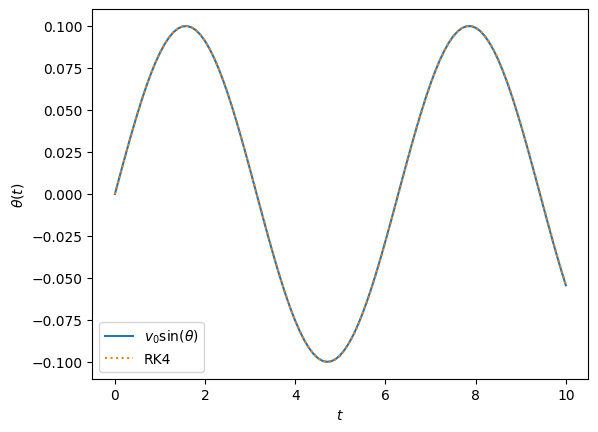

In [18]:
def F(x):
    theta, omega = x
    return np.array([omega, -np.sin(theta)])

n  = 1000
dt = 10 / n
X0 = [0, 0.1]
t0 = 0
X4, T4 = RK4(F, X0, t0, dt, n)

Theta4 = X4[:,0]
Omega4 = X4[:,1]

plt.plot(T,  X0[1] * np.sin(T), label=r"$v_0\sin(\theta)$")
plt.plot(T4, Theta4, ':',       label=r"RK4")
plt.xlabel(r"$t$")
plt.ylabel(r"$\theta(t)$")
plt.legend()

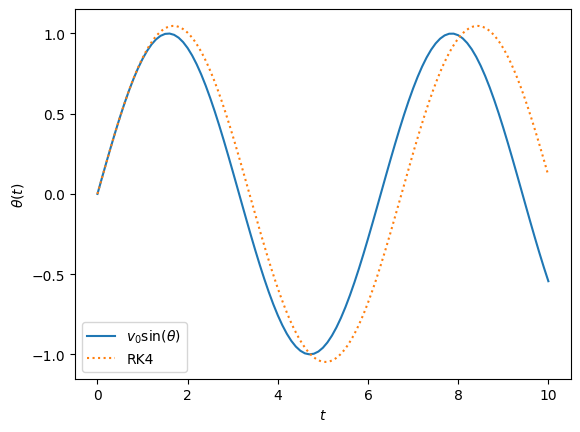

In [19]:
# When the initial velocity is no longer small, the simple harmonic
# oscillator approximation is no longer valid.

n  = 1000
dt = 10 / n
X0 = [0, 1]
t0 = 0
X4, T4 = RK4(F, X0, t0, dt, n)

Theta4 = X4[:,0]
Omega4 = X4[:,1]

plt.plot(T,  X0[1] * np.sin(T), label=r"$v_0\sin(\theta)$")
plt.plot(T4, Theta4, ':',       label=r"RK4")
plt.xlabel(r"$t$")
plt.ylabel(r"$\theta(t)$")
plt.legend()

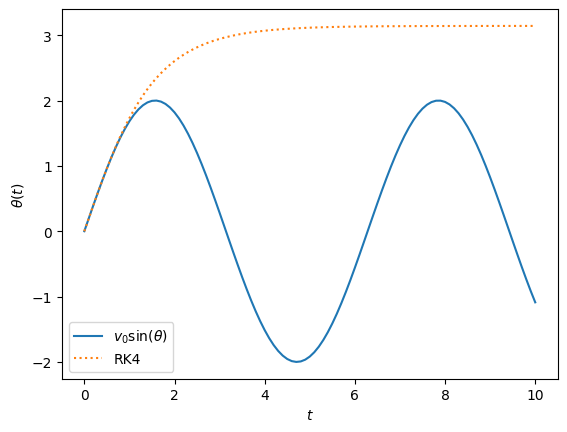

In [20]:
# When the initial velocity is large enough, the solution is not
# periodic.
# What's going on?

n  = 1000
dt = 10 / n
X0 = [0, 2]
t0 = 0
X4, T4 = RK4(F, X0, t0, dt, n)

Theta4 = X4[:,0]
Omega4 = X4[:,1]

plt.plot(T,  X0[1] * np.sin(T), label=r"$v_0\sin(\theta)$")
plt.plot(T4, Theta4, ':',    label=r"RK4")
plt.xlabel(r"$t$")
plt.ylabel(r"$\theta(t)$")
plt.legend()

In [21]:
# HANDSON: Try different values of dt and n and observe and initial
#          conditions.


## Final Comments

Using the insights we developed in numeric integration of functions,
we derive multiple ODE integrators.
Specifically, we derive the 4th-order Runge-Kutta (RK4) method as a
powerful and effective algorithm for solving ordinary differential
equations.

The classical RK4 method is not only highly accurate but also robust
and relatively simple to implement.
When paired with advanced techniques such as adaptive time-stepping
and dense output, `RK4` becomes even more versatile.
This makes `RK4` a reliable "workhorse" for ODE integration across
many applications.

However, it's important to remember that there are many other ODE
integrators available, each with strengths suited to specific types of
equations.
For certain problems, especially those involving stiffness or
requiring highly efficient, precise computations, other methods may
offer better performance.
For more information, see resources like
[Numerical Recipes](http://s3.amazonaws.com/nrbook.com/book_C210.html)
for additional options and implementation guidance.